In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)

In [2]:
non_super_users_df = pd.read_parquet("../data_users/NonSuperUserIds.parquet")
super_users_df = pd.read_parquet("../data_users/SuperUserIds.parquet")
print(non_super_users_df.shape)
print(non_super_users_df.head())

(22053173, 2)
    Id            CreationDate
18   2 2008-07-31 14:22:31.287
19   3 2008-07-31 14:22:31.287
22   8 2008-07-31 21:33:24.057
24  10 2008-07-31 21:57:06.240
25  11 2008-08-01 00:59:11.147


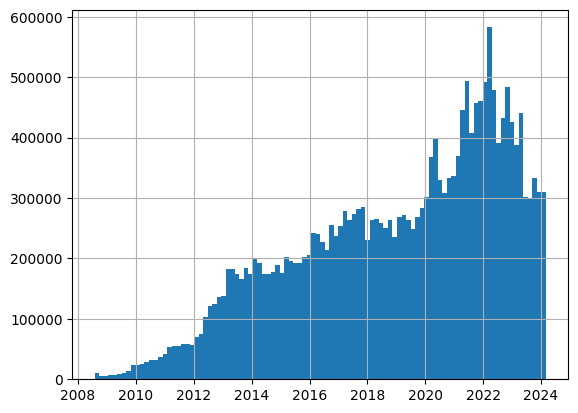

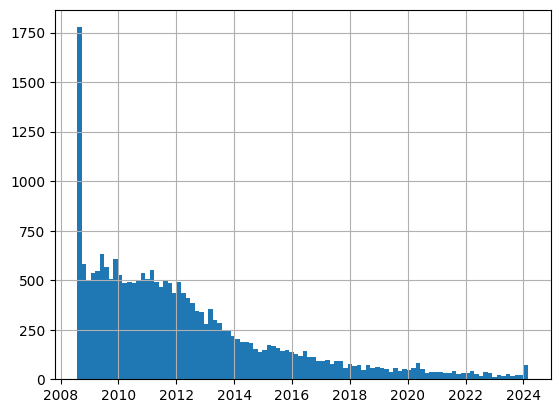

In [3]:
# histogram of CreationDate
non_super_users_df["CreationDate"] = pd.to_datetime(non_super_users_df["CreationDate"])
non_super_users_df["CreationDate"].hist(bins=100)
plt.show()

super_users_df["CreationDate"] = pd.to_datetime(super_users_df["CreationDate"])
super_users_df["CreationDate"].hist(bins=100)
plt.show()

(2205309, 3)
         Id            CreationDate CreationYearMonth
10943  1401 2008-08-15 07:32:15.980           2008-08
284     346 2008-08-04 21:30:40.220           2008-08
9132   1253 2008-08-13 22:27:40.250           2008-08
38689  3529 2008-08-29 00:02:13.410           2008-08
21850  3259 2008-08-27 15:24:02.260           2008-08


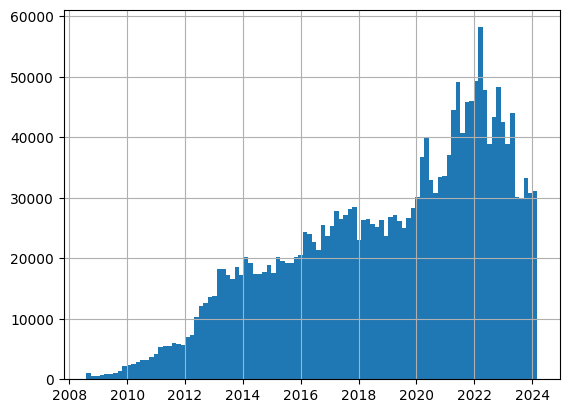

In [4]:
# for non super users, new column of creation year-month truncated by month
non_super_users_df["CreationYearMonth"] = non_super_users_df["CreationDate"].dt.to_period("M")
# for each year-month, sample 1% of users randomly
non_super_sample = []
for year_month, group in non_super_users_df.groupby("CreationYearMonth"):
    non_super_sample.append(group.sample(frac=0.1))
non_super_sample_df = pd.concat(non_super_sample)
print(non_super_sample_df.shape)
print(non_super_sample_df.head())
# save ids to parquet
non_super_sample_df[["Id"]].to_parquet("../data_users/NonSuperUserIdsSample.parquet")

# plotting to see if the distribution makes sense
non_super_sample_df["CreationDate"].hist(bins=100)
plt.show()